<a href="https://colab.research.google.com/github/AkashBhardwaj9078/ML-applications/blob/main/FruitDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/fruits.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fruit               62 non-null     object 
 1   Form                62 non-null     object 
 2   RetailPrice         62 non-null     float64
 3   RetailPriceUnit     62 non-null     object 
 4   Yield               62 non-null     float64
 5   CupEquivalentSize   62 non-null     float64
 6   CupEquivalentUnit   62 non-null     object 
 7   CupEquivalentPrice  62 non-null     float64
dtypes: float64(4), object(4)
memory usage: 4.0+ KB


In [ ]:
df.Form.value_counts()

Fresh     24
Canned    12
Juice     11
Dried      9
Frozen     6
Name: Form, dtype: int64

In [ ]:
fruits=[i[0] for i in df.Fruit.str.split(" ")]

fruit=[]
for i in fruits:
  if i[-1]==',':
    fruit.append(i[:-1])
  else:
    fruit.append(i)


In [ ]:
df['fruit']=fruit

In [ ]:
df

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice,fruit
0,Apples,Fresh,1.5193,per pound,0.90,0.2425,pounds,0.4094,Apples
1,"Apples, applesauce",Canned,1.0660,per pound,1.00,0.5401,pounds,0.5758,Apples
2,"Apples, ready-to-drink",Juice,0.7804,per pint,1.00,8.0000,fluid ounces,0.3902,Apples
3,"Apples, frozen concentrate",Juice,0.5853,per pint,1.00,8.0000,fluid ounces,0.2926,Apples
4,Apricots,Fresh,2.9665,per pound,0.93,0.3638,pounds,1.1603,Apricots
...,...,...,...,...,...,...,...,...,...
57,Raspberries,Fresh,6.6391,per pound,0.96,0.3197,pounds,2.2107,Raspberries
58,Raspberries,Frozen,4.1877,per pound,1.00,0.3307,pounds,1.3849,Raspberries
59,Strawberries,Fresh,2.5800,per pound,0.94,0.3197,pounds,0.8774,Strawberries
60,Strawberries,Frozen,2.8189,per pound,1.00,0.3307,pounds,0.9322,Strawberries


In [ ]:
x=df[['RetailPrice','Yield','CupEquivalentSize','CupEquivalentPrice']]
y=df['Form']

In [ ]:
# input values
x


,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
0,1.5193,0.90,0.2425,0.4094
1,1.0660,1.00,0.5401,0.5758
2,0.7804,1.00,8.0000,0.3902
3,0.5853,1.00,8.0000,0.2926
4,2.9665,0.93,0.3638,1.1603
...,...,...,...,...
57,6.6391,0.96,0.3197,2.2107
58,4.1877,1.00,0.3307,1.3849
59,2.5800,0.94,0.3197,0.8774
60,2.8189,1.00,0.3307,0.9322


In [ ]:
# classified form of fruits
y

0      Fresh
1     Canned
2      Juice
3      Juice
4      Fresh
       ...  
57     Fresh
58    Frozen
59     Fresh
60    Frozen
61     Fresh
Name: Form, Length: 62, dtype: object

In [ ]:
# split the data into test and train dataset
from sklearn.model_selection import train_test_split,cross_val_score,KFold

xtr,xts,ytr,yts=train_test_split(x,y,random_state=20,test_size=0.33)


In [ ]:
# importing  estimators
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier ,plot_tree
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# importing classification_report ,confusion_matrix and accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
lr=LogisticRegression()
# fitting the model
lr.fit(xtr,ytr)
# predicting the output
pred=lr.predict(xts)
pred


array(['Fresh', 'Juice', 'Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh',
       'Fresh', 'Juice', 'Fresh', 'Fresh', 'Juice', 'Canned', 'Fresh',
       'Fresh', 'Fresh', 'Fresh', 'Fresh', 'Dried', 'Fresh', 'Fresh'],
      dtype=object)

In [ ]:
# accurcy of LogisticRegression
print("accuracy_score :",accuracy_score(pred,yts))
print("classification Report \n",classification_report(pred,yts))
print("confusion matrix :\n",confusion_matrix(pred,yts))

accuracy_score : 0.6666666666666666
classification Report 
               precision    recall  f1-score   support

      Canned       0.00      0.00      0.00         1
       Dried       1.00      1.00      1.00         1
       Fresh       0.91      0.62      0.74        16
      Frozen       0.00      0.00      0.00         0
       Juice       1.00      1.00      1.00         3

    accuracy                           0.67        21
   macro avg       0.58      0.53      0.55        21
weighted avg       0.88      0.67      0.75        21

confusion matrix :
 [[ 0  0  1  0  0]
 [ 0  1  0  0  0]
 [ 5  0 10  1  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  3]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# cross_validation_score
scores=cross_val_score(lr,xtr,ytr,cv=KFold(5))
print("the cross_validation scores:\n",scores)
print("the average score \n",(scores.mean()))


the cross_validation scores:
 [0.66666667 0.625      0.875      0.5        0.625     ]
the average score 
 0.6583333333333333


In [ ]:
# using decisiontreeClassifier
dt=DecisionTreeClassifier()
# fiiting and predicting the values
dt.fit(xtr,ytr)
pred=dt.predict(xts)
pred



array(['Fresh', 'Juice', 'Canned', 'Fresh', 'Canned', 'Fresh', 'Fresh',
       'Canned', 'Juice', 'Canned', 'Fresh', 'Juice', 'Canned', 'Fresh',
       'Fresh', 'Canned', 'Frozen', 'Fresh', 'Dried', 'Canned', 'Fresh'],
      dtype=object)

In [ ]:
# accurcy of DecisionTreeClassifier
print("accuracy_score :",accuracy_score(pred,yts))
print("classification Report \n",classification_report(pred,yts))
print("confusion matrix :\n",confusion_matrix(pred,yts))

accuracy_score : 0.9047619047619048
classification Report 
               precision    recall  f1-score   support

      Canned       1.00      0.71      0.83         7
       Dried       1.00      1.00      1.00         1
       Fresh       0.82      1.00      0.90         9
      Frozen       1.00      1.00      1.00         1
       Juice       1.00      1.00      1.00         3

    accuracy                           0.90        21
   macro avg       0.96      0.94      0.95        21
weighted avg       0.92      0.90      0.90        21

confusion matrix :
 [[5 0 2 0 0]
 [0 1 0 0 0]
 [0 0 9 0 0]
 [0 0 0 1 0]
 [0 0 0 0 3]]


[Text(0.5, 0.875, 'x[2] <= 0.424\ngini = 0.779\nsamples = 41\nvalue = [7, 8, 13, 5, 8]'),
 Text(0.25, 0.625, 'x[2] <= 0.215\ngini = 0.618\nsamples = 26\nvalue = [0, 8, 13, 5, 0]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0, 0, 0]'),
 Text(0.375, 0.375, 'x[1] <= 0.98\ngini = 0.401\nsamples = 18\nvalue = [0, 0, 13, 5, 0]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5, 0]'),
 Text(0.75, 0.625, 'x[2] <= 4.27\ngini = 0.498\nsamples = 15\nvalue = [7, 0, 0, 0, 8]'),
 Text(0.625, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0, 0, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 8]')]

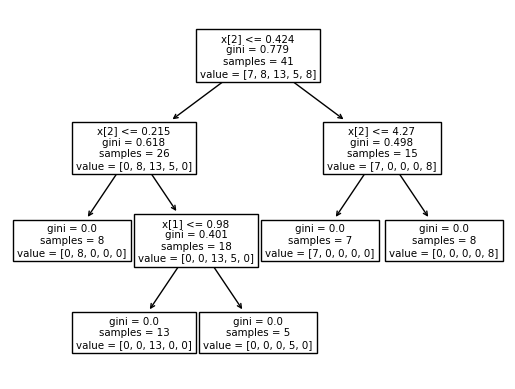

In [ ]:
plot_tree(dt)

In [ ]:
# cross_validation_score of decison_tree_classifier
scores=cross_val_score(dt,xtr,ytr,cv=KFold(5))
print("the cross_validation scores:\n",scores)
print("the average score \n",(scores.mean()))

the cross_validation scores:
 [0.88888889 1.         1.         0.875      0.75      ]
the average score 
 0.9027777777777779


In [ ]:
# targeting the CupEquivalentUnit
y=df['CupEquivalentUnit']
x=df.select_dtypes("float64")
xtr,xts,ytr,yts=train_test_split(x,y,random_state=42)


In [ ]:

dt=DecisionTreeClassifier()
dt.fit(xtr,ytr)
pred=dt.predict(xts)
pred


array(['fluid ounces', 'fluid ounces', 'pounds', 'pounds', 'pounds',
       'pounds', 'pounds', 'pounds', 'pounds', 'pounds', 'pounds',
       'pounds', 'pounds', 'pounds', 'pounds', 'pounds'], dtype=object)

In [ ]:
# accuarcy score of DecisiontreeClassifier while targetting the cupequivalent unit
print("accuracy_score :",accuracy_score(pred,yts))
print("classification Report \n",classification_report(pred,yts))
print("confusion matrix :\n",confusion_matrix(pred,yts))
# cross_validation_score of decison_tree_classifier
scores=cross_val_score(dt,xtr,ytr,cv=KFold(5))
print("the cross_validation scores:\n",scores)
print("the average score \n",(scores.mean()))


accuracy_score : 1.0
classification Report 
               precision    recall  f1-score   support

fluid ounces       1.00      1.00      1.00         2
      pounds       1.00      1.00      1.00        14

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

confusion matrix :
 [[ 2  0]
 [ 0 14]]
the cross_validation scores:
 [1. 1. 1. 1. 1.]
the average score 
 1.0


[Text(0.5, 0.75, 'x[2] <= 4.27\ngini = 0.315\nsamples = 46\nvalue = [9, 37]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

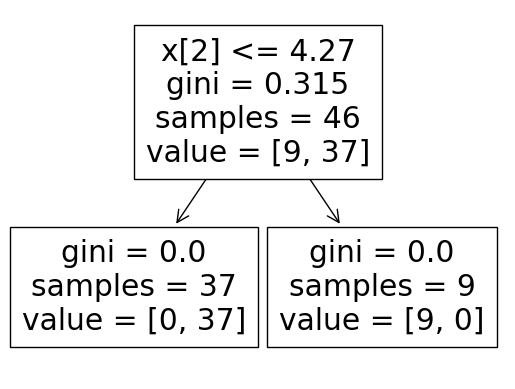

In [ ]:
plot_tree(dt)

In [ ]:
df.fruit.value_counts()

Pineapple       6
Apples          4
Apricots        4
Peaches         4
Grapes          4
Plum            3
Pears           3
Oranges         3
Blueberries     2
Blackberries    2
Strawberries    2
Raspberries     2
Pomegranate     2
Papaya          2
Mangoes         2
Grapefruit      2
Fruit           2
Cherries        2
Honeydew        1
Kiwi            1
Cantaloupe      1
Nectarines      1
Berries         1
Figs            1
Bananas         1
Dates           1
Cranberries     1
Clementines     1
Watermelon      1
Name: fruit, dtype: int64

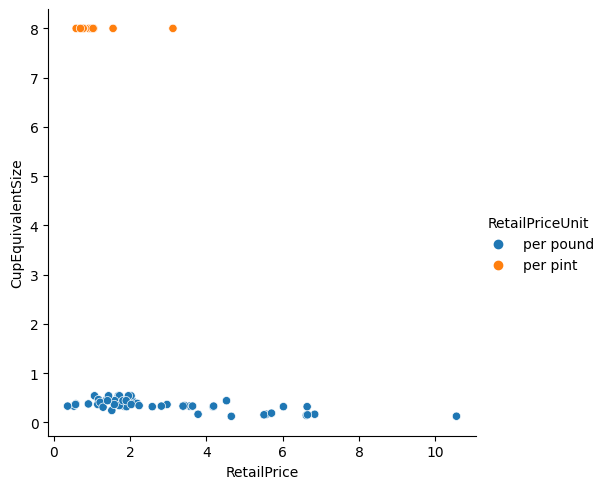

In [ ]:
sns.relplot(x=df['RetailPrice'],y=df['CupEquivalentSize'],hue=df['RetailPriceUnit'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '0.46'),
  Text(1, 0, '0.49'),
  Text(2, 0, '0.51'),
  Text(3, 0, '0.52'),
  Text(4, 0, '0.56'),
  Text(5, 0, '0.62'),
  Text(6, 0, '0.64'),
  Text(7, 0, '0.65'),
  Text(8, 0, '0.68'),
  Text(9, 0, '0.71'),
  Text(10, 0, '0.76'),
  Text(11, 0, '0.77'),
  Text(12, 0, '0.9'),
  Text(13, 0, '0.91'),
  Text(14, 0, '0.92'),
  Text(15, 0, '0.93'),
  Text(16, 0, '0.94'),
  Text(17, 0, '0.95'),
  Text(18, 0, '0.96'),
  Text(19, 0, '1.0')])

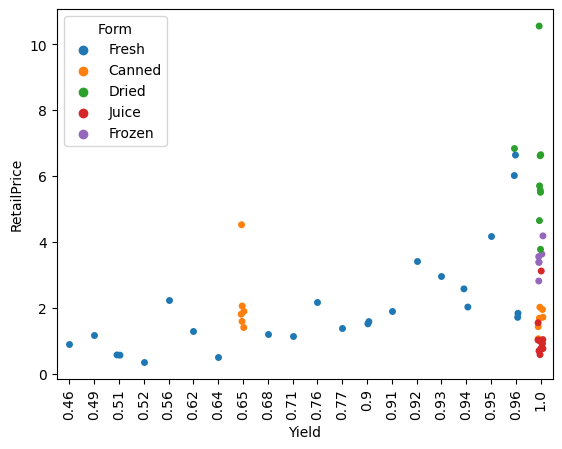

In [ ]:
sns.stripplot(x=df['Yield'],y=df["RetailPrice"],hue=df['Form'])
plt.xticks(rotation=90)

<Axes: xlabel='Form', ylabel='CupEquivalentSize'>

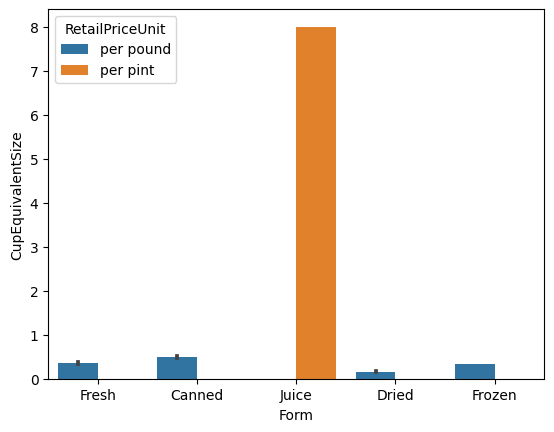

In [ ]:
sns.barplot(x=df['Form'],hue=df["RetailPriceUnit"],y=df['CupEquivalentSize'])

<Axes: xlabel='Form', ylabel='CupEquivalentPrice'>

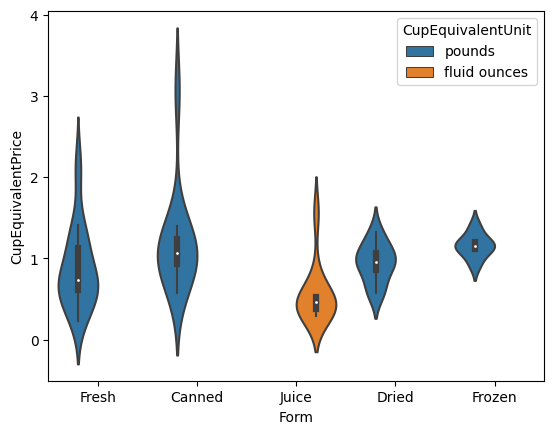

In [ ]:
sns.violinplot(x=df['Form'],y=df['CupEquivalentPrice'],hue=df['CupEquivalentUnit'],split=False)

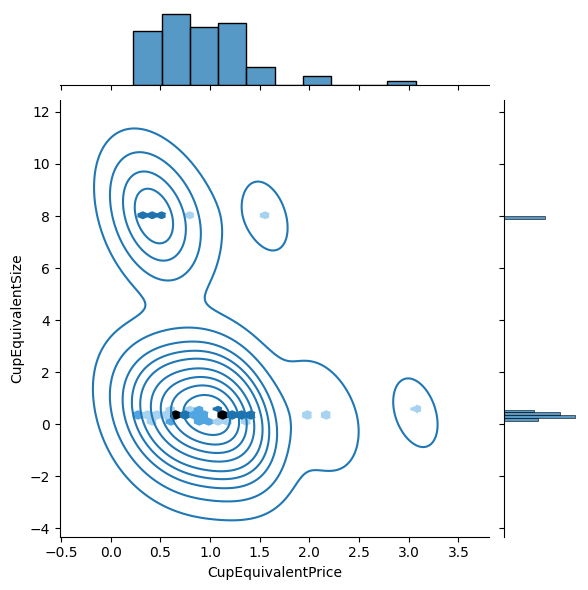

In [ ]:
sns.jointplot(x=df['CupEquivalentPrice'],y=df['CupEquivalentSize'],kind='hex').plot_joint(sns.kdeplot)

In [ ]:

df

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice,fruit
0,Apples,Fresh,1.5193,per pound,0.90,0.2425,pounds,0.4094,Apples
1,"Apples, applesauce",Canned,1.0660,per pound,1.00,0.5401,pounds,0.5758,Apples
2,"Apples, ready-to-drink",Juice,0.7804,per pint,1.00,8.0000,fluid ounces,0.3902,Apples
3,"Apples, frozen concentrate",Juice,0.5853,per pint,1.00,8.0000,fluid ounces,0.2926,Apples
4,Apricots,Fresh,2.9665,per pound,0.93,0.3638,pounds,1.1603,Apricots
...,...,...,...,...,...,...,...,...,...
57,Raspberries,Fresh,6.6391,per pound,0.96,0.3197,pounds,2.2107,Raspberries
58,Raspberries,Frozen,4.1877,per pound,1.00,0.3307,pounds,1.3849,Raspberries
59,Strawberries,Fresh,2.5800,per pound,0.94,0.3197,pounds,0.8774,Strawberries
60,Strawberries,Frozen,2.8189,per pound,1.00,0.3307,pounds,0.9322,Strawberries
